In [1]:
import bigframes.pandas as bf
df = bf.read_gbq("pstat-135-235-spring-2025.voterfile.AK")
df.head(20)

,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,...,PRI_BLT_2018,PRI_BLT_2016,PRI_BLT_2014,PRI_BLT_2012,PRI_BLT_2010,PRI_BLT_2008,PRI_BLT_2006,PRI_BLT_2004,PRI_BLT_2002,PRI_BLT_2000
0,384054,LALAK177159882,A,01052209,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,O,O,O,O,O,<NA>,<NA>,<NA>,<NA>,<NA>
1,526299,LALAK176858971,A,00488927,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,R,R,R,R,R,R,R,R,<NA>,<NA>
2,258603,LALAK177046425,A,00918851,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,D,<NA>,D,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,279067,LALAK541516066,A,01313044,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,459740,LALAK177058551,A,00917414,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,R,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,116004,LALAK176829079,A,00291752,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,R,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,312990,LALAK585047314,A,01348706,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,137430,LALAK176808849,A,00244058,<NA>,907,243-0866,(907) 243-0866,9072430866,4,...,<NA>,<NA>,O,<NA>,O,O,O,<NA>,<NA>,<NA>
8,238125,LALAK177196598,A,01083546,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,O,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,368704,LALAK176760909,A,00047778,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,R,R,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


The notebook is running on my machine's default runtime in 'us-west1', we can connect to an external runtime for quicker results.

With the "Open Job" page, we see the much longer SQL query that is running behind the scenes, and we can see the execution details and chart like in the last BigQuery exercise.

In [8]:
%%bigquery results

SELECT
  2000 AS year,
  AVG(CASE WHEN General_2000 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2002 AS year,
  AVG(CASE WHEN General_2002 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2004 AS year,
  AVG(CASE WHEN General_2004 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2006 AS year,
  AVG(CASE WHEN General_2006 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2008 AS year,
  AVG(CASE WHEN General_2008 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2010 AS year,
  AVG(CASE WHEN General_2010 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2012 AS year,
  AVG(CASE WHEN General_2012 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2014 AS year,
  AVG(CASE WHEN General_2014 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2016 AS year,
  AVG(CASE WHEN General_2016 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

UNION ALL

SELECT
  2018 AS year,
  AVG(CASE WHEN General_2018 = 'Y' THEN 1.0 ELSE 0 END) AS turnout
FROM `pstat-135-235-spring-2025.voterfile.AK`

ORDER BY year;

Query is running:   0%|          |

Downloading:   0%|          |

In [16]:
results

,year,turnout
0,2000,0.000000
1,2002,0.000000
2,2004,0.337253
3,2006,0.288220
4,2008,0.398697
5,2010,0.348372
6,2012,0.414155
7,2014,0.437020
8,2016,0.510768
9,2018,0.488920


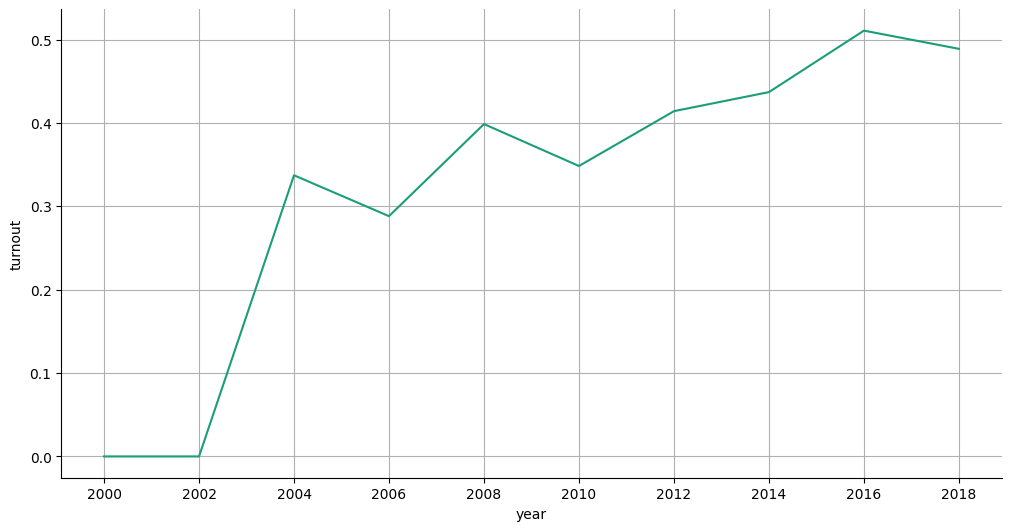

In [19]:
# @title year vs turnout

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['turnout']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.grid(True)
plt.xticks(results['year'].astype(int))
plt.xlabel('year')
_ = plt.ylabel('turnout')

In comparing the two methods used to query, graph, and examine the Alaska year vs turnout data, we found that the BigQuery Studio method was more convenient for quick data analysis, but using BigQuery Notebooks is ideal for further in-depth analysis of queried data. This is due to the ability to make more tweaks to the data and your visualizaitons within the BigQuery Notebooks.